## - 불러올 패키지 목록

In [1]:
# 파이썬 기본 패키지
import math  # 수학 함수 패키지
import itertools  # Functions creating iterators for efficient looping

# 데이터 핸들링을 위한 패키지
import numpy as np
import pandas as pd

# statsmodels 패키지
from statsmodels.api import *
from statsmodels.formula.api import *
from statsmodels.stats.api import *
from statsmodels.stats.proportion import *
from statsmodels.stats.diagnostic import *
from statsmodels.stats.weightstats import *
from statsmodels.stats.outliers_influence import *  # 다중공선성 확인 관련 패키지
from statsmodels.multivariate.pca import PCA as pca  # 대문자로 사용할 경우 sklearn 의 PCA와 겹침

# 시계열 관련 statsmodels 패키지
from statsmodels.tsa.api import *
from statsmodels.tsa.ar_model import *
from statsmodels.tsa.arima.model import *
from statsmodels.tsa.arima_process import *
from statsmodels.tsa.statespace import *
from statsmodels.graphics.api import *
from statsmodels.graphics.tsaplots import *

# SciPy 패키지
import scipy as sp
import scipy.stats as stats  # 통계 분석을 위한 패키지
from scipy.cluster.hierarchy import *  # 계층적 군집 분석을 위한 패키지

# pingouin 패키지
import pingouin as pg

# scikit-learn 패키지
from sklearn.preprocessing import *  # 데이터 전처리를 위한 패키지
from sklearn.feature_selection import *  # 알고리즘에 큰 영향을 미치는 feature를 우선순위대로 선택하는 기능 제공
from sklearn.model_selection import *  # 데이터 분리, 검증 및 파라미터 튜닝을 위한 패키지
from sklearn.metrics import *  # 모델에 대한 다양한 성능 평가를 위한 패키지
from sklearn.linear_model import *    # 선형 회귀 분석을 위한 패키지 (로지스틱 회귀 포함)
from sklearn.cluster import *  # 비지도 군집화 알고리즘 제공
from sklearn.tree import *  # 의사결정나무 알고리즘 제공
from sklearn.ensemble import *  # 앙상블 알고리즘 제공
from sklearn.neighbors import *  # kNN 알고리즘 제공
from sklearn.svm import *  # 서포트 벡터 머신 알고리즘 제공
from sklearn.mixture import *  # 혼합분포군집(GMM 등) 알고리즘 제공
from sklearn.decomposition import *  # 차원축소 알고리즘 제공
from sklearn.multiclass import OneVsRestClassifier  # multiclass 분류기 알고리즘 제공

# mlxtend 패키지
from mlxtend.preprocessing import *  # 연관분석에 필요한 트랜잭션 전처리 알고리즘 포함
from mlxtend.frequent_patterns import *  # 연관분석에 사용되는 알고리즘 포함 
from mlxtend.plotting import plot_decision_regions
from mlxtend.feature_selection import SequentialFeatureSelector as SFS  # 변수선택 알고리즘 포함
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

# missingno 패키지 (데이터 전처리 전 결측치 확인)
import missingno as msno

# label별 데이터 카운트를 위한 모듈
from collections import Counter  # https://docs.python.org/3/library/collections.html

# 시각화를 위한 패키지
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.cm as cm  # 내장 colormap, colormap 처리 유틸리티
from matplotlib.colors import ListedColormap  # colors and colormaps
from mlxtend.plotting import plot_decision_regions
%matplotlib inline
# %matplotlib inline 의 목적은 plt.show()함수가 호출되지 않은 경우에도 matplotlib 다이어그램을 렌더링하는 것이다.
# 그러나 현재 업데이트된 버전의 주피터 노트북 버전에서는 %matplotlib inline 를 사용하지 않더라도 Matplotlib 다이어그램을 개체로 표현한다.
# 따라서 굳이 필요하지는 않다. 그러나 코드를 깨끗하게 유지하고 자신이 만든 플롯을 호출하기 위해 여전히 관례적으로 권장된다.

# 경고 메시지 무시
import warnings
warnings.filterwarnings('ignore')

# 그래프 스타일 서식 지정
plt.style.use('default')

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

# 그래프 축의 음수 표현 오류 방지
plt.rcParams['axes.unicode_minus'] = False
#
#

# 데이터 불러오기 및 전처리

In [2]:
df_arrest = pd.read_csv( r'C:\Users\Boanerges\GitHub\TIL\rawdata\USArrests.csv',
                         index_col = 'Unnamed: 0')
df_arrest

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9
Georgia,17.4,211,60,25.8


# x값(예측변수) 설정

In [3]:
list(df_arrest.columns)

['Murder', 'Assault', 'UrbanPop', 'Rape']

In [4]:
x = df_arrest.iloc[:, 0:4]

In [5]:
x.index

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object')

# 계층적 군집 분석 수행
- `scipy.cluster.hierarchy.linkage( y, method='single', metric='euclidean', optimal_ordering=False )`  
  - method = {’single’, ’complete’, ’average’, ’weighted’, ’centroid’, ’median’, ’ward’}
- https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html

## 군집화 수행
- `scipy.cluster.hierarchy.linkage( y, method='single', metric='euclidean', optimal_ordering=False )`
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html

In [6]:
# 최단 연결법으로 군집화 수행
linked_single = linkage(x, 'single')

## 덴드로그램 출력
- `scipy.cluster.hierarchy.dendrogram( Z, p=30, truncate_mode=None, color_threshold=None, get_leaves=True, orientation='top', labels=None, count_sort=False, distance_sort=False, show_leaf_counts=True, no_plot=False, no_labels=False, leaf_font_size=None, leaf_rotation=None, leaf_label_func=None, show_contracted=False, link_color_func=None, ax=None, above_threshold_color='C0' )`
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html

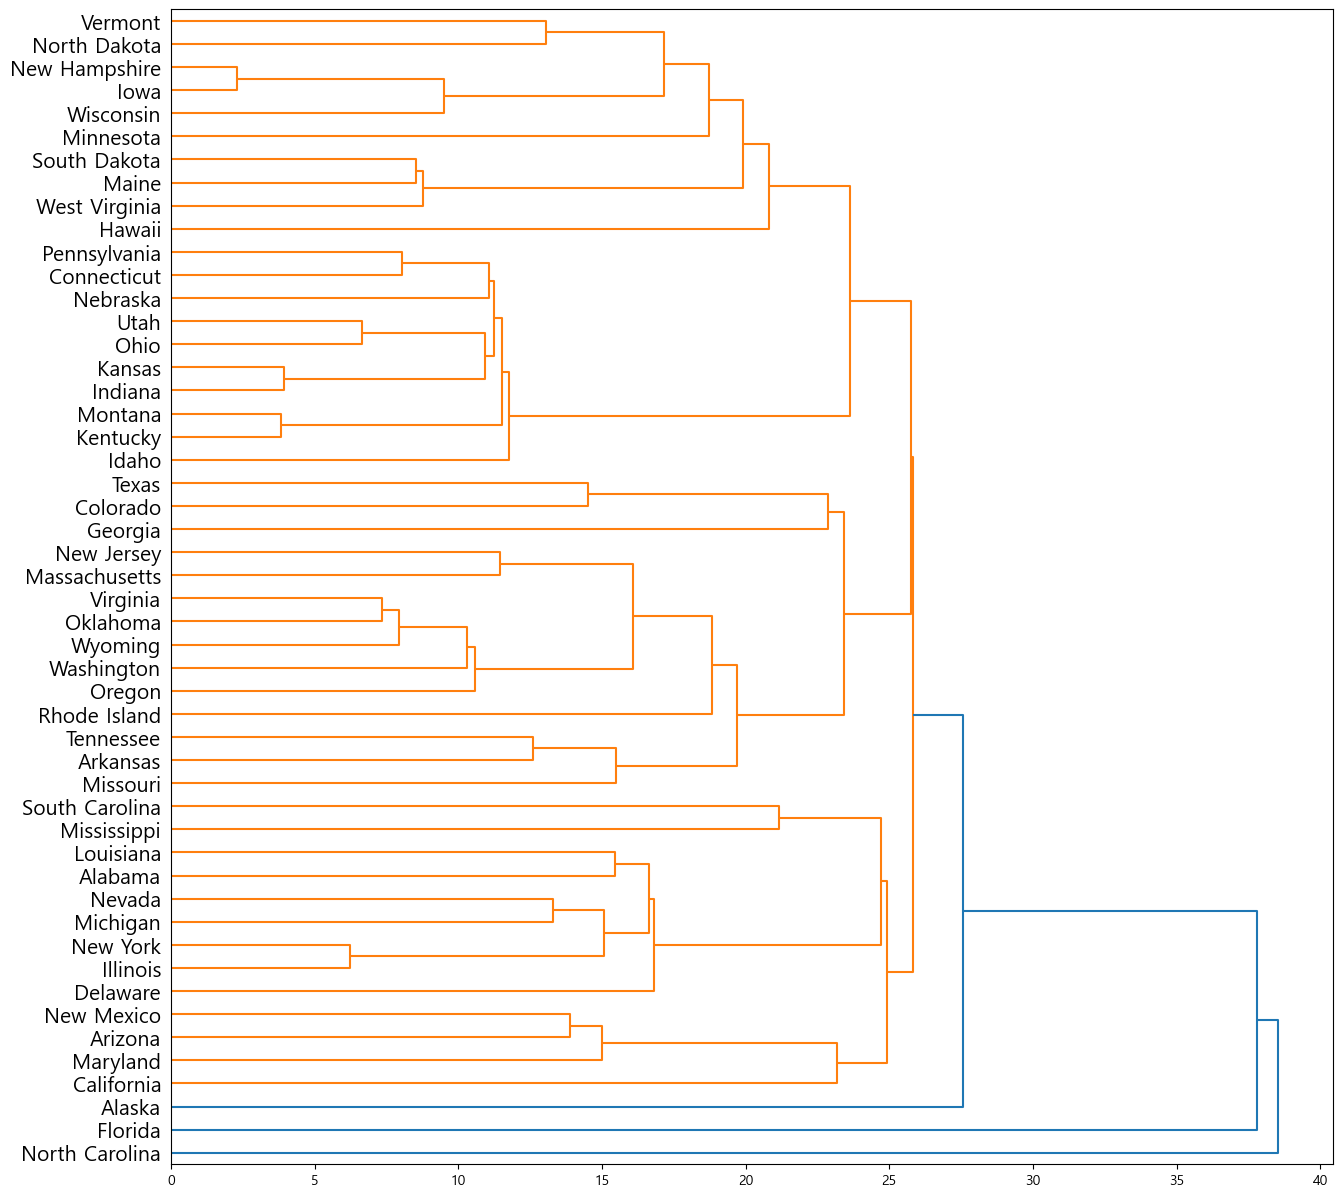

In [7]:
# 덴드로그램 그리기
plt.figure( figsize=(15,15) )

dendrogram( linked_single,
            orientation = 'right',
            leaf_font_size = 15,
            labels = x.index)

plt.show()

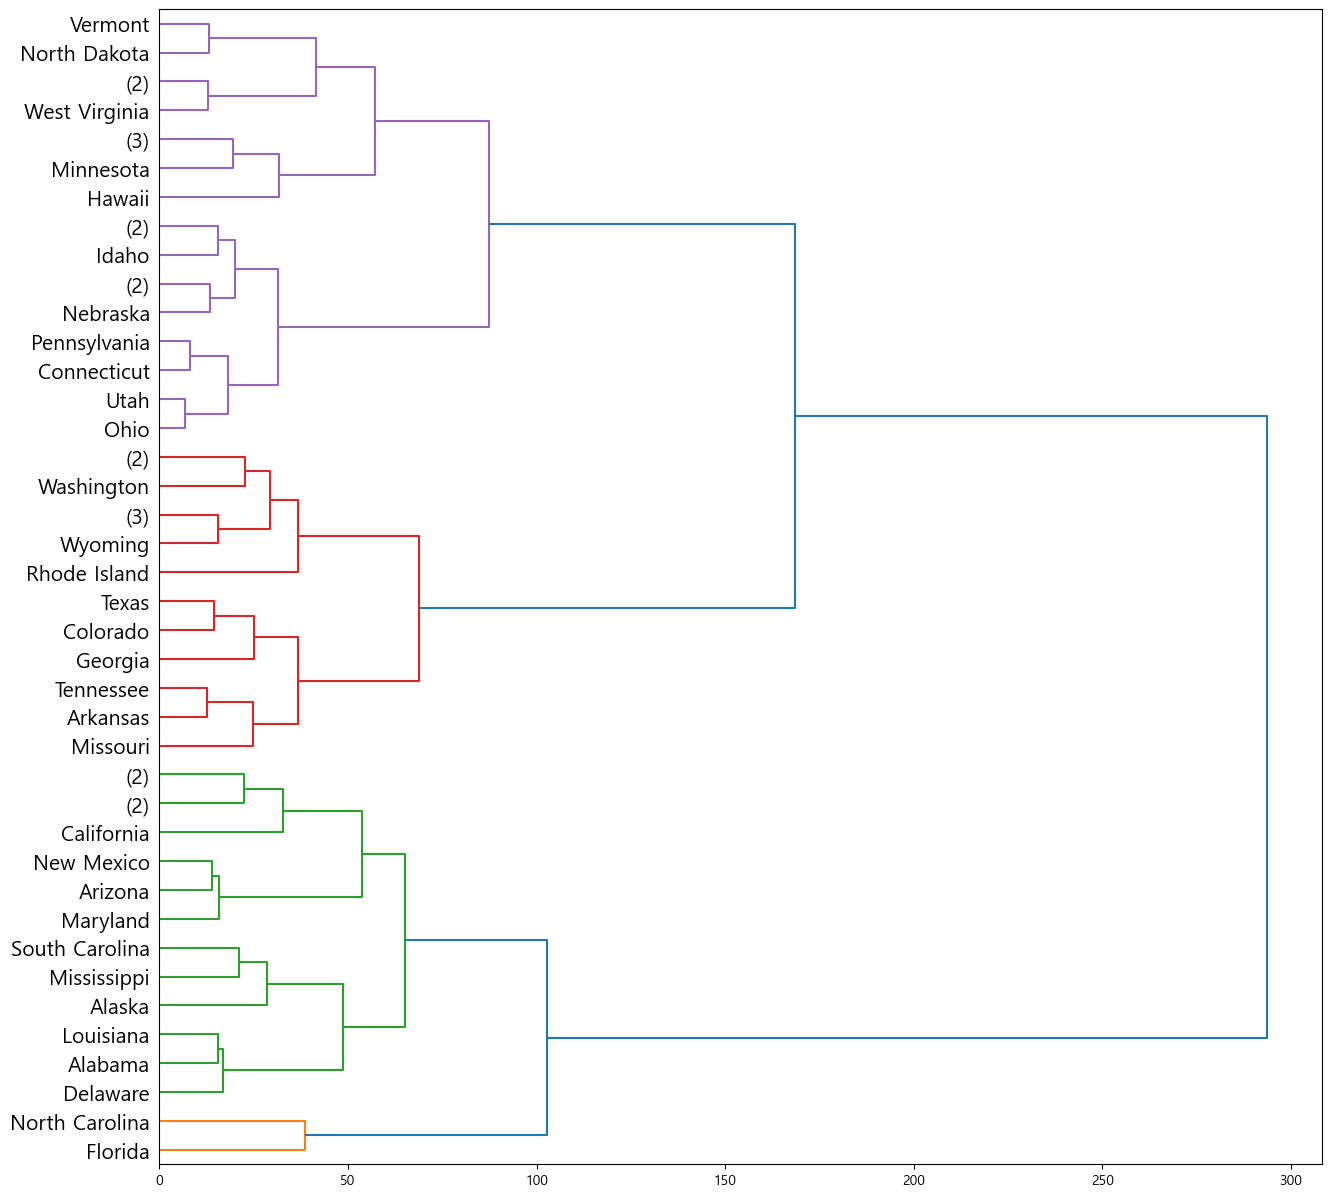

In [8]:
# 최장 연결법으로 군집화 수행
linked_complete = linkage(x, 'complete')

plt.figure( figsize=(15,15) )

dendrogram( linked_complete,
            truncate_mode = 'level', p = 5,  # 6개 군집까지만 출력
            color_threshold = 100,
            orientation = 'right',
            leaf_font_size = 15,
            labels = x.index)

plt.show()

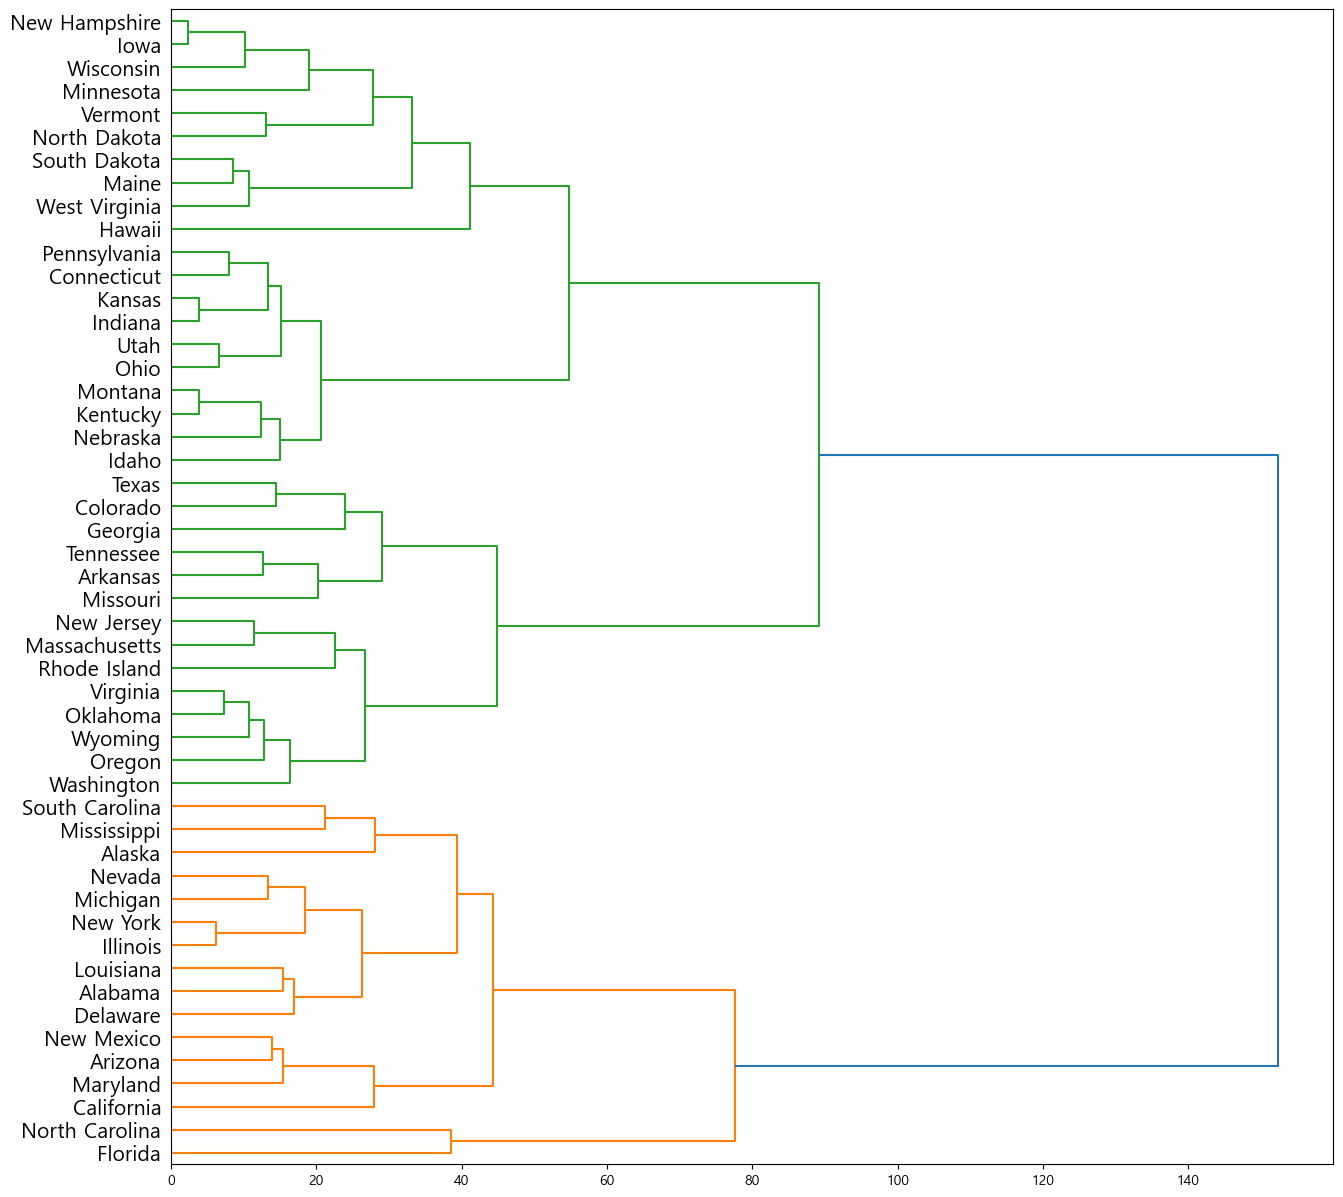

In [9]:
# 평균 연결법으로 군집화 수행
linked_average = linkage(x, 'average')

plt.figure( figsize=(15,15) )

dendrogram( linked_average,
            orientation = 'right',
            leaf_font_size = 15,
            labels = x.index)

plt.show()

# 군집화 결과 확인
- `scipy.cluster.hierarchy.fcluster( Z, t, criterion='inconsistent', depth=2, R=None, monocrit=None )`
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.fcluster.html

In [10]:
cut_tree = fcluster( linked_average,
                     t = 6,
                     criterion = 'maxclust' )
cut_tree

array([2, 2, 2, 4, 2, 4, 5, 2, 1, 4, 6, 5, 2, 5, 6, 5, 5, 2, 6, 2, 3, 2,
       6, 2, 4, 5, 5, 2, 6, 3, 2, 2, 1, 6, 5, 3, 3, 5, 3, 2, 6, 4, 4, 5,
       6, 3, 3, 6, 6, 3], dtype=int32)

In [11]:
# 군집화 값과 state 매칭

df_group = pd.DataFrame( {'pred_group':cut_tree,
                           'state':x.index} )

df_group.sort_values('pred_group')

,pred_group,state
32,1,North Carolina
8,1,Florida
0,2,Alabama
19,2,Maryland
27,2,Nevada
17,2,Louisiana
30,2,New Mexico
31,2,New York
12,2,Illinois
23,2,Mississippi


## [미해결] 군집별로 색을 다르게...

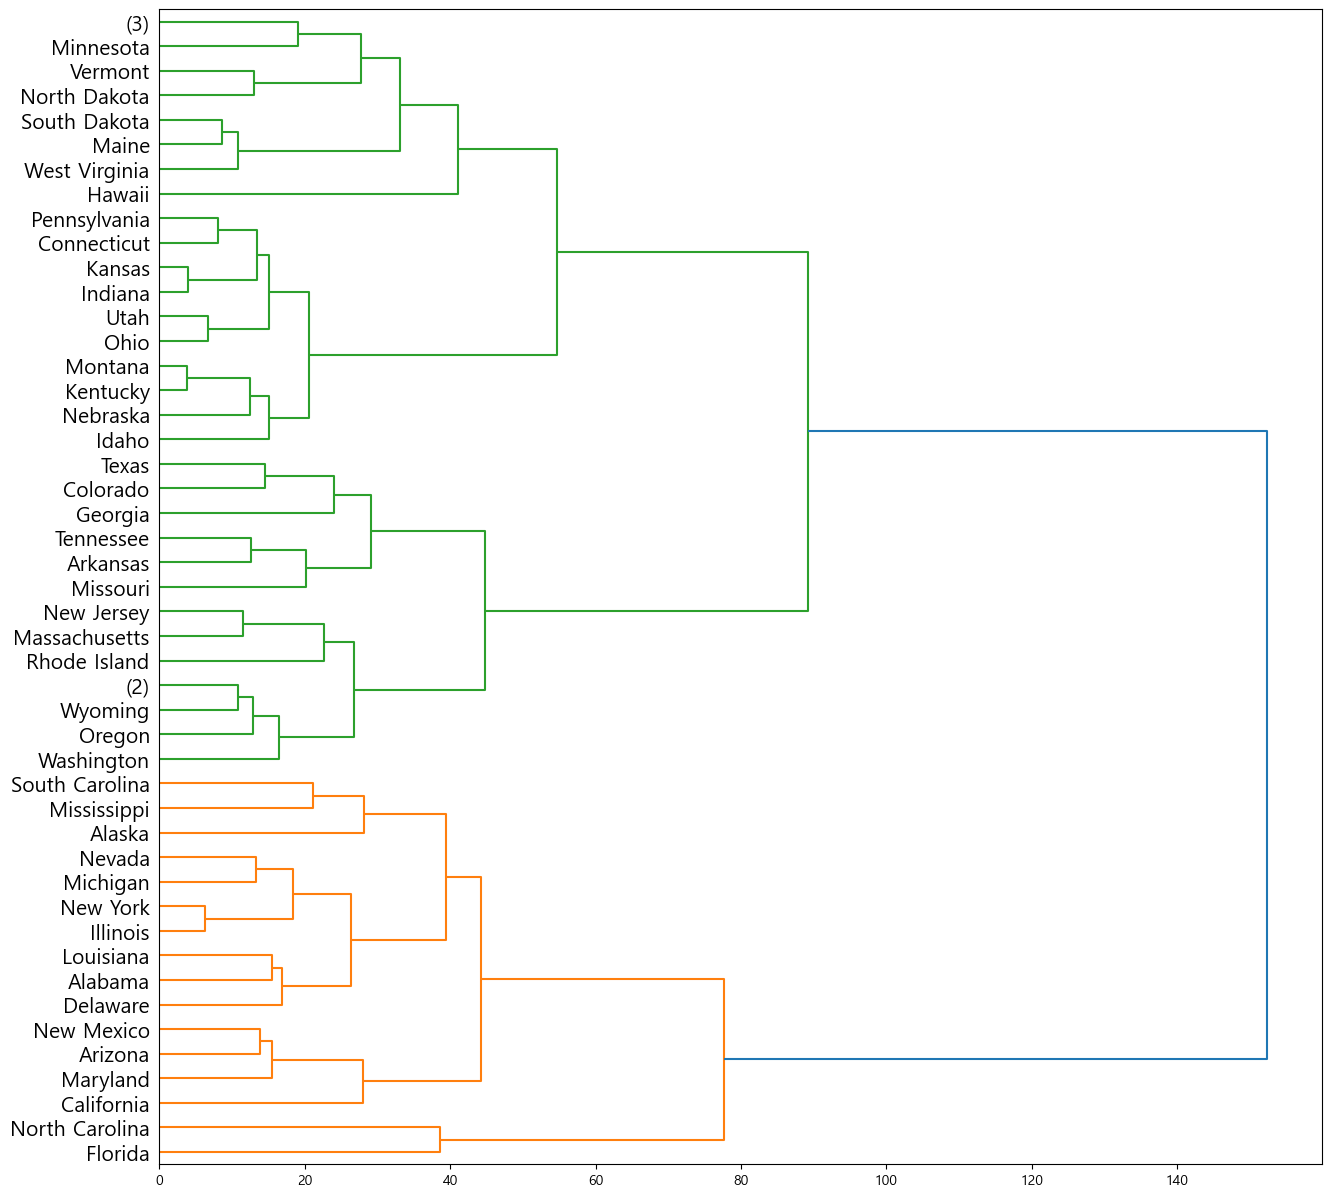

In [12]:
# 평균 연결법으로 군집화 수행
linked_average = linkage(x, 'average')

plt.figure( figsize=(15,15) )

dendrogram( linked_average,
            truncate_mode = 'level', p = 6,
            orientation = 'right',
            leaf_font_size = 15,
            labels = x.index,
            color_threshold = None)

plt.show()